In [2]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.6 MB/s eta 0:00:00


SARIMA (Seasonal Autoregressive Integrated Moving Average)

SARIMA (parameters for non-seasonal: p, d, q)  (parameters for seasonal: P, D, Q, s):

    AR(p): Autoregressive component of order p

    MA(q): Moving average component of order q

    I(d): Integrated component of order d

    Seasonal AR(P): Seasonal autoregressive component of order P

    MA(Q): Seasonal moving average component of order Q

    Seasonal I(D): Seasonal integrated component of order D

    s: Seasonal period




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/uday8/Documents/Msc. DSAI/SEM 2/TSA/Data/AirPassengers.csv',parse_dates=['Month'],index_col='Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


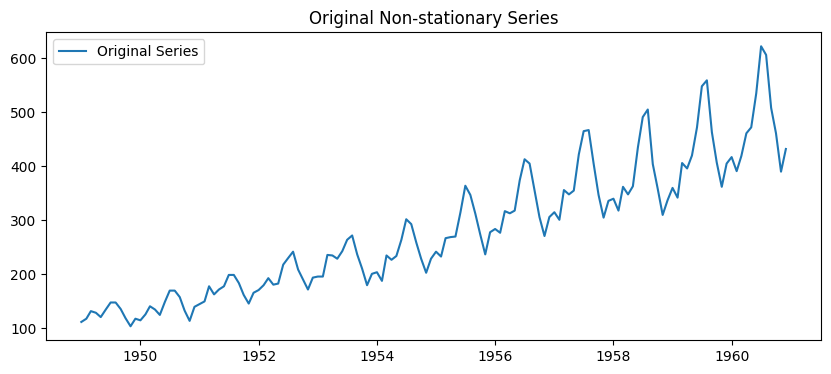

In [3]:
time_series = pd.Series(df['#Passengers'])

plt.figure(figsize=(10,4))
plt.plot(time_series, label = 'Original Series')
plt.title('Original Non-stationary Series')
plt.legend()
plt.show()

In [4]:
time_series = pd.Series(df['#Passengers'])

In [5]:
# adf_test
def adf_test(series):
    result = adfuller(series)
    print('Adf Statistics:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f' {key}:{value}')
    if result[1] <= 0.05:   # p-value is responsible for considering data is stationary or not
        print('The series is Stationary')
    else:
        print('The series is not Stationary')

print("\nADF Test for differencing Series:")
adf_test(df['#Passengers'])


ADF Test for differencing Series:
Adf Statistics: 0.8153688792060482
p-value: 0.991880243437641
Critical Values:
 1%:-3.4816817173418295
 5%:-2.8840418343195267
 10%:-2.578770059171598
The series is not Stationary


In [6]:
df['#Passengers_diff'] = df['#Passengers'].diff(2).dropna()
adf_test(df['#Passengers_diff'].dropna())

Adf Statistics: -2.9616951355554244
p-value: 0.03862975767698839
Critical Values:
 1%:-3.4816817173418295
 5%:-2.8840418343195267
 10%:-2.578770059171598
The series is Stationary


In [7]:
stepwise_fit = auto_arima(df['#Passengers'], seasonal = True, m = 12, trace = True) # if seasonal is then it is sarima
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=2.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.53 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.24 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=1.13 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.56 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=1.39 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.21 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.22 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.73 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.81 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=3.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.23 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.23 sec
 ARIMA(3,1,1)(0,1,0

In [8]:
model = SARIMAX(df['#Passengers'], order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
sarima_result = model.fit()

print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Wed, 05 Feb 2025   AIC                           1022.299
Time:                                    10:17:25   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.357      0.721      -0.825       0.570
ma.L1         -0.2149      0.325   

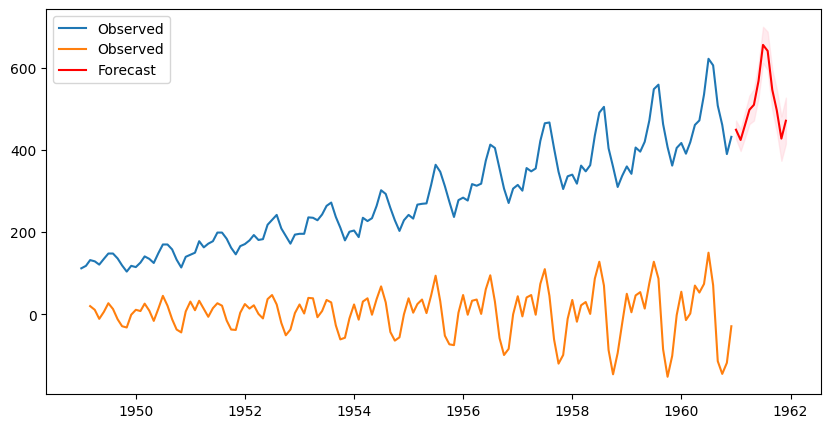

In [9]:
forecast = sarima_result.get_forecast(steps = 12)
conf_int = forecast.conf_int()

plt.figure(figsize = (10, 5))
plt.plot(df, label = 'Observed')
plt.plot(forecast.predicted_mean, label = 'Forecast', color = 'red')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color = 'pink', alpha = 0.3)
plt.legend()
plt.show()